In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")


DAILY_DATA_PATH = "./dates_deaths.csv"


def import_clean_daily_data(daily_data_path: str) -> pd.DataFrame:
    """Cleans the datetimes in the dataset."""
    vefat_daily = pd.read_csv(daily_data_path, sep="\t", header=None)
    vefat_daily.columns = ["dates", "numbers"]
    vefat_daily = vefat_daily.loc[vefat_daily.numbers != "None", :]
    vefat_daily["numbers"] = pd.to_numeric(vefat_daily.numbers)
    vefat_daily["dates"] = pd.to_datetime(vefat_daily["dates"], dayfirst=True)
    vefat_daily.index = vefat_daily["dates"]
    del vefat_daily["dates"]
    return vefat_daily


def create_weekly_data(dataframe: pd.DataFrame, col_name: str, resample: bool = False) -> pd.DataFrame:
    """Takes the weekly average for a given dataframe and column name."""
    if resample:
        return dataframe[col_name].resample("W").mean()
    else:
        return dataframe[col_name].rolling(7, center=True).mean()


def plot_series(dataframe: pd.DataFrame, col_name: str = None, title: str = "") -> None:
    """To make it uniform in all the analysis."""
    fig, ax = plt.subplots(figsize = (12, 8))
    if col_name is not None:
        len_col = len(dataframe[col_name])
        ax.set_yticks(range(0, len_col, 20))
        ax.set_title(title)
        ax.set_ylim(ymin=0)
        dataframe[col_name].plot(linewidth=1.5, color="#FF6F26")
    else:
        len_col = len(dataframe)
        ax.set_yticks(range(0, len_col, 20))
        ax.set_title(title)
        ax.set_ylim(ymin=0)
        dataframe.plot(linewidth=1.5, color="#FF6F26")

In [15]:
daily_data = import_clean_daily_data(DAILY_DATA_PATH)
weekly_data = create_weekly_data(daily_data, "numbers")

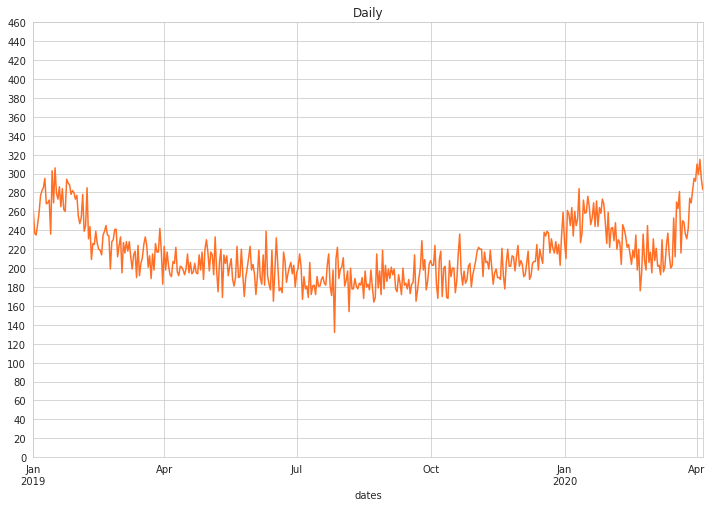

In [17]:
plot_series(dataframe=daily_data, col_name="numbers", title="Daily")

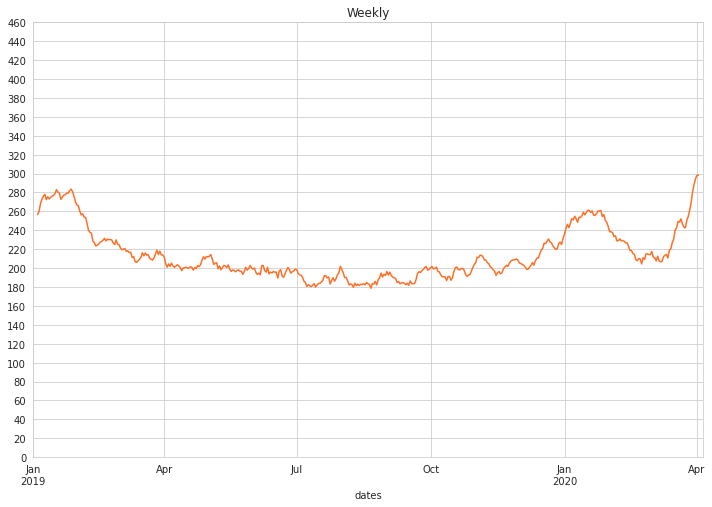

In [18]:
plot_series(dataframe=weekly_data, title="Weekly")